In [8]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import gmaps

from config import gkey

gmaps.configure(api_key=gkey)

In [9]:
df1 = pd.read_csv("Resources/Crimes_LA.csv")
rent1 = pd.read_csv("Resources/LA_rentmedianf.csv")
rent1.head()

,Median Rent 2016,Tract Number,Neighborhood,Location
0,900,212305,Koreatown,"(34.056107, -118.298204)"
1,1391,101110,Tujunga,"(34.2595555, -118.293602)"
2,1924,101122,Tujunga,"(34.267357, -118.29024)"
3,1141,101210,Tujunga,"(34.251998, -118.2926875)"
4,1123,101220,Tujunga,"(34.2511895, -118.281014)"


In [10]:
df1["Variable"] = df1["Variable"].replace(
    {"Part I Violent Crimes": "Violent Crimes", "Part I Property Crimes": "Property Crimes"})

In [11]:
df = df1[df1.Year == 2016]
pc = df.loc[(df.Variable=="Property Crimes")]
vc = df.loc[(df.Variable=="Violent Crimes")]
pc.head(1)

,Policy Area,Dataset,Variable,Year,Count,Tract,Tract Number,Neighborhood,GEOID,Location,Latitude,Longitude,Row ID,Date
4,Public Safety,Part I Crimes,Property Crimes,2016,29.012024,"Census Tract 5540.01, Los Angeles County, Cali...",554001,Bellflower,1400000US06037554001,"(33.898299, -118.1330425)",33.898299,-118.133043,Part_I_Property_Crimes_2016_1400000US06037554001,1/1/16


In [12]:
violent1 = vc[["Neighborhood", "Variable", "Count", "Tract Number", "Location", "Latitude", "Longitude"]]
prop1 = pc[["Neighborhood", "Variable", "Count", "Tract Number", "Location", "Latitude", "Longitude"]]
rent = rent1[["Median Rent 2016", "Tract Number"]]
violent1.head(5)

,Neighborhood,Variable,Count,Tract Number,Location,Latitude,Longitude
5,Bellflower,Violent Crimes,5.913979,554301,"(33.8831365, -118.146945)",33.883136,-118.146945
8,Pacoima,Violent Crimes,8.526603,104403,"(34.2589085, -118.4345385)",34.258909,-118.434539
14,Granada Hills,Violent Crimes,0.000000,106641,"(34.298025, -118.509153)",34.298025,-118.509153
31,Lake Balboa,Violent Crimes,3.742982,131200,"(34.2147545, -118.514238)",34.214754,-118.514238
34,Green Meadows,Violent Crimes,10.821717,240020,"(33.954224, -118.263804)",33.954224,-118.263804


In [15]:
finalp = prop1.merge(rent, on="Tract Number", how="left")
finalpc = finalp[["Neighborhood", "Variable", "Tract Number", "Count", "Median Rent 2016", "Latitude", "Longitude", "Location"]]
finalpc.head()

,Neighborhood,Variable,Tract Number,Count,Median Rent 2016,Latitude,Longitude,Location
0,Bellflower,Property Crimes,554001,29.012024,1178.0,33.898299,-118.133043,"(33.898299, -118.1330425)"
1,Santa Clarita,Property Crimes,920039,6.746988,2104.0,34.421706,-118.438361,"(34.4217055, -118.4383615)"
2,Sylmar,Property Crimes,107010,16.429699,1604.0,34.302027,-118.446501,"(34.302027, -118.446501)"
3,Hollywood,Property Crimes,189903,0.000000,1660.0,34.102646,-118.347590,"(34.1026455, -118.34759)"
4,North Hills,Property Crimes,117404,34.025631,1593.0,34.228481,-118.479066,"(34.228481, -118.479066)"


In [16]:
finalv = violent1.merge(rent, on="Tract Number", how="left")
finalvc = finalv[["Neighborhood", "Variable", "Tract Number", "Count", "Median Rent 2016", "Latitude", "Longitude", "Location"]]
finalvc.head()


,Neighborhood,Variable,Tract Number,Count,Median Rent 2016,Latitude,Longitude,Location
0,Bellflower,Violent Crimes,554301,5.913979,1357.0,33.883136,-118.146945,"(33.8831365, -118.146945)"
1,Pacoima,Violent Crimes,104403,8.526603,1518.0,34.258909,-118.434539,"(34.2589085, -118.4345385)"
2,Granada Hills,Violent Crimes,106641,0.000000,2481.0,34.298025,-118.509153,"(34.298025, -118.509153)"
3,Lake Balboa,Violent Crimes,131200,3.742982,2030.0,34.214754,-118.514238,"(34.2147545, -118.514238)"
4,Green Meadows,Violent Crimes,240020,10.821717,1315.0,33.954224,-118.263804,"(33.954224, -118.263804)"


In [37]:
finalvc_grouped = finalvc.groupby("Neighborhood")["Median Rent 2016"].mean()
grouped = finalvc_grouped.sort_values(ascending = False)
grouped

linear regression


Neighborhood
Rolling Hills                            3500.000000
Beverlywood                              3463.000000
Malibu                                   3202.000000
Westlake Village                         2811.500000
Beverly Hills                            2727.000000
Pacific Palisades                        2686.833333
Porter Ranch                             2678.428571
Rancho Palos Verdes                      2639.500000
Cheviot Hills                            2577.500000
Marina del Rey                           2575.000000
Calabasas                                2554.333333
Castaic                                  2521.333333
Unincorporated Santa Monica Mountains    2504.714286
Agoura Hills                             2488.000000
Topanga                                  2405.000000
Beverly Crest                            2388.000000
West Hills                               2381.272727
Century City                             2372.000000
Stevenson Ranch                  

In [28]:
#Get values for mean of Violent Crime count per Neighborhood and the min (Lat, long) to plot
vc_count = violent1.groupby(["Neighborhood"])["Count"].mean()
vc_lat = violent1.groupby(["Neighborhood"])["Latitude"].min()
vc_lng = violent1.groupby(["Neighborhood"])["Longitude"].min()
vc_location = violent1.groupby(["Neighborhood"])[["Latitude", "Longitude"]].min()
vc_location.head()

#Get values for mean of Property Crime count per Neighborhood and the min (Lat, long) to plot
prop_count = prop1.groupby(["Neighborhood"])["Count"].mean()
pc_lat = prop1.groupby(["Neighborhood"])["Latitude"].min()
pc_lng = prop1.groupby(["Neighborhood"])["Longitude"].min()




In [38]:
finalpc_min = prop_count.sort_values(ascending = True)
finalpc_max = prop_count.sort_values(ascending = False)

top_npc = finalpc_max[0:7]
low_npc = finalpc_min[0:7]

#Property Crime Values
prent_min = finalpc.sort_values(by =["Median Rent 2016"], ascending = True)
prent_max = finalpc.sort_values(by =["Median Rent 2016"], ascending = False)

#Violent Crime Values
vrent_min = finalvc.sort_values(by =["Median Rent 2016"], ascending = True)
vrent_max = finalvc.sort_values(by =["Median Rent 2016"], ascending = False)
# low_prent = prent_min[0:7]
# top_prent = prent_max[0:7]

plow_count = prent_min["Count"][0:7]
ptop_count = prent_max["Count"][0:7]
vlow_count = vrent_min["Count"][0:7]
vtop_count = vrent_max["Count"][0:7]
vrent_max.head()

,Neighborhood,Variable,Tract Number,Count,Median Rent 2016,Latitude,Longitude,Location
273,Studio City,Violent Crimes,143901,3.302666,3500.0,34.132849,-118.394762,"(34.132849, -118.3947615)"
851,Porter Ranch,Violent Crimes,108101,0.406174,3500.0,34.280038,-118.541372,"(34.280038, -118.5413715)"
826,Rancho Palos Verdes,Violent Crimes,670702,0.372648,3500.0,33.751372,-118.328527,"(33.7513725, -118.3285275)"
298,Unincorporated Santa Monica Mountains,Violent Crimes,800202,0.337041,3500.0,34.111882,-118.672485,"(34.111882, -118.6724855)"
1459,Rolling Hills,Violent Crimes,670500,0.000000,3500.0,33.760874,-118.347924,"(33.760874, -118.347924)"


Text(0.5, 1.0, 'Lowest Rent-Priced Neighborhoods vs. Crime Counts')

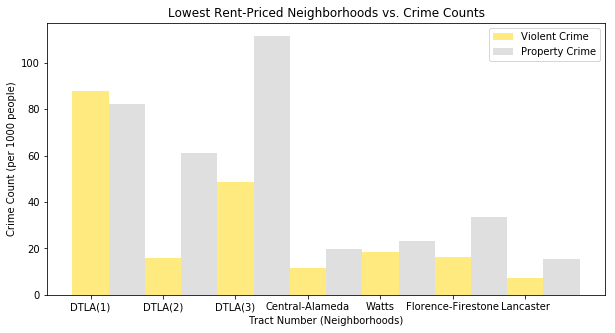

In [23]:
#Property Crime Bar Graph
plt.figure(figsize=(10, 5))
neighborhoods = ["DTLA(1)", "DTLA(2)", "DTLA(3)", "Central-Alameda", "Watts", "Florence-Firestone", "Lancaster"]
ind = np.arange(len(neighborhoods))
width = .5
plt.bar(ind, vlow_count, width =.5, color="gold", alpha=0.5, align="center", label="Violent Crime")
plt.bar(ind + width, plow_count, width =.5, color="silver", alpha=0.5, align="center", label="Property Crime")

plt.xticks(ind, neighborhoods)

plt.ylabel("Crime Count (per 1000 people)")
plt.xlabel("Tract Number (Neighborhoods)")
plt.legend(loc="upper right")
plt.title("Lowest Rent-Priced Neighborhoods vs. Crime Counts")


Text(0.5, 1.0, 'Highest Rent-Priced Neighborhoods vs. Crime Counts')

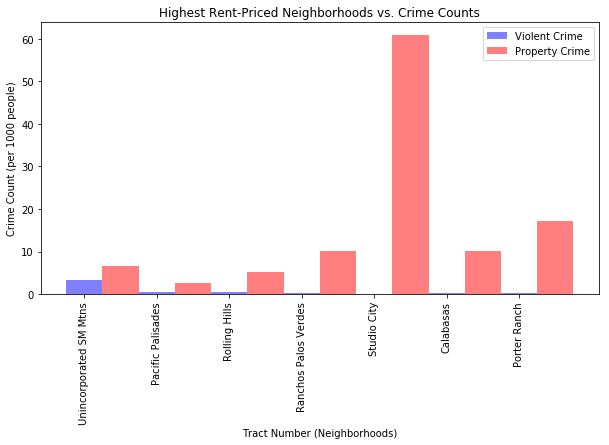

In [24]:
#Top Rent Crime Bar Graph
plt.figure(figsize=(10, 5))
neighborhoods = ["Unincorporated SM Mtns", "Pacific Palisades", "Rolling Hills", "Ranchos Palos Verdes", "Studio City", "Calabasas", "Porter Ranch"]
ind = np.arange(len(neighborhoods))
width = .5
plt.bar(ind, vtop_count, width =.5, color="blue", alpha=0.5, align="center", label="Violent Crime")
plt.bar(ind + width, ptop_count, width =.5, color="red", alpha=0.5, align="center", label="Property Crime")

plt.xticks(ind, neighborhoods, rotation="vertical")

plt.ylabel("Crime Count (per 1000 people)")
plt.xlabel("Tract Number (Neighborhoods)")

plt.legend(loc="upper right")
plt.title("Highest Rent-Priced Neighborhoods vs. Crime Counts")

In [ ]:
locations = vc_lat

# Convert Poverty Rate to float and store
# HINT: be sure to handle NaN values
poverty_rate = census_data_complete["Poverty Rate"].astype(float)


# Create a poverty Heatmap layer
locations = 

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=poverty_rate, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1

fig.add_layer(heat_layer)

fig